In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
loc="F:\\Projects\\HealthInsurance\\Dataset\\Insurance.csv"
df=pd.read_csv(loc)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [20]:
from sklearn.linear_model import LinearRegression

In [36]:
lm=LinearRegression()

In [22]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [31]:
oxford=dict()
oxford={1:'smoker',0:'non-smoker'}
oxford

{0: 'non-smoker', 1: 'smoker'}

In [29]:
for i in range(len(df)):
    if df.iloc[i,4]=='yes':
        df.iloc[i,4]=1
    else:
        df.iloc[i,4]=0

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [32]:
df['smoker']=df['smoker'].astype('int')

In [33]:
df.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


In [43]:
z=df[['age','bmi','children','smoker']]

In [44]:
lm.fit(z,df[['charges']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
lm.coef_

array([[  257.84950728,   321.85140247,   473.50231561, 23811.3998446 ]])

In [46]:
import matplotlib.pyplot as plt

In [47]:
yhat=lm.predict(z)

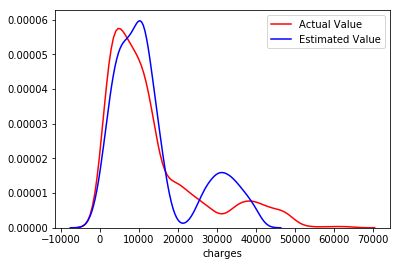

In [48]:
axl=sns.distplot(df['charges'],hist=False,color="r",label="Actual Value")
sns.distplot(yhat,hist=False,color="b",label="Estimated Value",ax=axl)

In [64]:
oxford_=dict()
z=0;
for i in df['region'].unique():
    oxford_[i]=z
    z=z+1;
oxford_   

{'northeast': 3, 'northwest': 2, 'southeast': 1, 'southwest': 0}

In [70]:
for i in range(len(df)):
    x=df.iloc[i,5]
    df.iloc[i,5]=oxford_[x]
df.head()  

KeyError: 0

In [69]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,0,2,10600.5483
1334,18,female,31.92,0,0,3,2205.9808
1335,18,female,36.85,0,0,1,1629.8335
1336,21,female,25.80,0,0,0,2007.9450
1337,61,female,29.07,0,1,2,29141.3603


In [71]:
df['region']=df['region'].astype("int")

In [72]:
df.corr()

,age,bmi,children,smoker,region,charges
age,1.000000,0.109272,0.042469,-0.025019,-0.002127,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.198341,0.067998,0.787251,0.006208,1.000000


(0, 66925.0097041049)

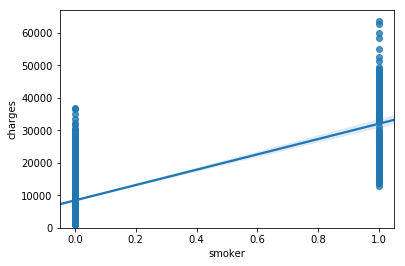

In [73]:
sns.regplot(x=df['smoker'],y=df['charges'],data=df)
plt.ylim(0,)

TypeError: Could not convert femalemalemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalemalefemalemalefemalefemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalemalemalemalefemalemalefemalefemalefemalemalefemalemalemalemalemalefemalemalefemalemalemalemalefemalefemalefemalemalemalefemalemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalefemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalemalemalefemalefemalefemalefemalemalefemalemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalemalefemalemalemalemalemalefemalefemalefemalefemalemalefemalefemalefemalefemalemalemalemalemalemalefemalefemalemalefemalefemalefemalemalemalefemalefemalemalemalemalefemalefemalefemalemalefemalemalefemalemalemalemalemalefemalemalemalemalefemalemalefemalemalemalefemalefemalemalemalefemalemalemalefemalemalemalemalemalemalemalemalefemalemalefemalemalefemalefemalemalemalefemalefemalemalefemalefemalefemalemalefemalemalemalefemalemalemalemalemalemalefemalemalefemalefemalefemalefemalemalefemalefemalemalefemalemalefemalemalemalefemalemalemalemalefemalemalemalefemalemalemalemalemalefemalemalefemalemalefemalemalefemalefemalefemalemalemalemalemalefemalefemalemalefemalemalefemalefemalemalemalefemalemalefemalefemalefemalemalefemalemalemalemalemalefemalefemalemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalemalemalefemalemalemalefemalemalefemalefemalemalefemalemalemalefemalemalefemalemalemalefemalefemalemalefemalemalemalefemalefemalefemalemalemalemalefemalefemalemalefemalefemalemalefemalemalefemalemalemalemalemalemalemalefemalefemalefemalefemalemalefemalemalefemalemalemalemalemalefemalemalefemalefemalemalefemalemalefemalemalefemalefemalemalemalemalemalemalemalemalefemalefemalemalefemalefemalemalefemalemalemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalemalemalemalemalefemalefemalemalefemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalemalefemalefemalemalemalemalemalefemalemalemalemalefemalefemalemalemalemalemalemalemalemalemalefemalemalefemalefemalefemalefemalemalefemalefemalefemalemalemalemalefemalemalemalemalemalefemalefemalefemalemalefemalefemalefemalefemalemalemalemalefemalefemalefemalemalefemalemalefemalefemalemalemalemalefemalemalefemalefemalemalemalefemalefemalefemalemalefemalemalefemalefemalefemalefemalefemalefemalemalefemalemalefemalemalemalemalefemalemalefemalemalefemalefemalefemalefemalemalemalefemalemalefemalefemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalefemalemalemalefemalemalemalefemalemalemalemalefemalemalemalefemalemalemalemalefemalefemalemalemalemalemalemalefemalemalemalemalefemalemalefemalefemalefemalefemalefemalefemalefemalefemalemalefemalefemalemalefemalefemalemalefemalemalemalefemalemalefemalemalefemalemalefemalefemalemalefemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalemalemalemalemalemalefemalefemalefemalemalemalefemalefemalefemalemalefemalefemalefemalefemalemalefemalefemalemalefemalefemalemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalemalefemalefemalefemalemalemalefemalefemalefemalefemalefemalemalemalemalemalemalemalefemalemalefemalemalemalefemalemalefemalemalemalefemalemalemalefemalefemalemalemalefemalemalemalemalefemalefemalemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalemalemalemalemalemalefemalefemalefemalemalemalemalefemalefemalemalefemalemalefemalemalemalefemalefemalemalefemalefemalemalefemalemalefemalefemalefemalemalemalefemalefemalemalemalemalefemalefemalemalefemalefemalemalemalefemalefemalemalefemalemalemalemalemalemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalefemalemalefemalemalefemalemalefemalefemalefemalefemalefemalemalefemalemalefemalefemalefemalefemalemalemalemalemalemalefemalemalefemalemalemalemalefemalefemalemalemalefemalemalemalefemalefemalemalemalemalefemalemalemalefemalefemalemalemalemalefemalefemalemalefemalefemalemalemalemalemalefemalefemalemalefemalemalefemalemalemalefemalefemalemalefemalefemalemalefemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalemalefemalemalefemalemalefemalemalemalemalefemalefemalemalemalefemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalefemalefemalefemalemalemalemalemalemalemalefemalefemalefemalefemalefemalemalemalemalemalefemalefemalemalemalemalefemalemalefemalemalefemalemalefemalefemalefemalefemalemalefemalefemalefemalefemalefemalefemalemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalefemalemalefemalefemalefemalefemalemalefemalemalemalefemalefemalemalemalemalefemalefemalefemalefemalemalemalefemalemalefemalemalemalefemalemalemalefemalemalefemalefemalemalefemalemalefemalemalemalemalefemalemalefemalefemalefemalemalemalemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalefemalefemalefemalemalemalemalemalemalemalemalefemalefemalemalemalemalemalemalefemalemalefemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalemalefemalefemalemalemalemalemalemalefemalefemalemalefemalefemalefemalefemalemalefemalemalefemalefemalemalemalefemalemalefemalefemalefemalemalefemalemalefemalefemalemalemalemalemalefemalemalemalefemalefemalefemalefemalefemalefemalemalefemalefemalefemalefemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalefemalemalemalefemalefemalefemalefemalemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalefemalefemalefemalemalemalefemalemalemalemalemalefemalemalefemalemalefemalemalemalemalemalefemalefemalemalemalemalefemalefemalefemalemalemalefemalemalefemalemalemalemalemalemalefemalefemalemalefemalemalefemalefemalemalefemalemalemalefemalefemalemalemalefemalemalefemalemalemalemalemalefemalefemalefemalefemalefemalemalefemalefemalemalefemalefemalefemalemalefemalemalefemalemalemalefemalemalemalemalemalefemalefemalemalefemalefemalefemalefemalemalemalefemalefemalefemalemalemalefemalemalemalemalemalemalemalefemalemalefemalemalemalefemalemalemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalefemalemalemalefemalemalemalemalefemalemalemalefemalemalefemalemalefemalefemalefemalemalefemalefemalefemalefemale to numeric

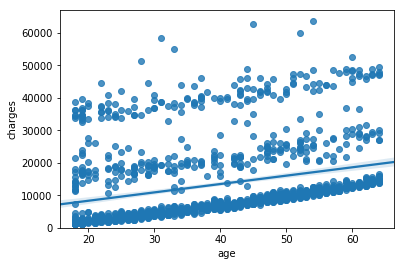

In [74]:
for i in df.columns:
    sns.regplot(x=df[i],y=df['charges'],data=df)
    plt.ylim(0,)

In [81]:
oxford_gen=dict()
z=0;
for i in df['sex'].unique():
    oxford_gen[i]=z
    z=z+1;
oxford_gen 

{'female': 0, 'male': 1}

In [83]:
for i in range(len(df)):
    x=df.iloc[i,1]
    df.iloc[i,1]=oxford_gen[x]
df.head()  

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [84]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [85]:
df['bmi']=df['bmi']/df['bmi'].max()

In [86]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,0.525127,0,1,0,16884.92400
1,18,1,0.635611,1,0,1,1725.55230
2,28,1,0.621118,3,0,1,4449.46200
3,33,1,0.427348,0,0,2,21984.47061
4,32,1,0.543572,0,0,2,3866.85520


In [90]:
z=df[['age','bmi','smoker']]

In [91]:
lm.fit(z,df[['charges']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
yhat=lm.predict(z)

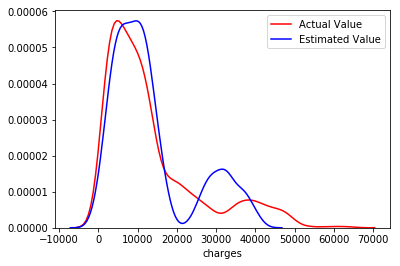

In [93]:
axl=sns.distplot(df['charges'],hist=False,color="r",label="Actual Value")
sns.distplot(yhat,hist=False,color="b",label="Estimated Value",ax=axl)

In [96]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [100]:
df_test=df[['age','sex','charges']]
df_grp=df_test.groupby(['age','sex'],as_index=False).mean()
df_grp

,age,sex,charges
0,18,0,6522.257919
1,18,1,7603.180557
2,19,0,9611.799484
3,19,1,9876.241479
4,20,0,7351.917571
5,20,1,12780.292557
6,21,0,5350.394655
7,21,1,4193.191381
8,22,0,7635.835562
9,22,1,12073.083743


In [102]:
df_pivot=df_grp.pivot(index='age',columns='sex')
df_pivot

charges              
sex             0             1
age                            
18    6522.257919   7603.180557
19    9611.799484   9876.241479
20    7351.917571  12780.292557
21    5350.394655   4193.191381
22    7635.835562  12073.083743
23   18590.470551   6249.169528
24    6569.819790  14726.212134
25    7993.993028  11436.821289
26    6013.517349   6238.092207
27   13961.746882  10407.656561
28    6515.807413  11622.567716
29    7341.088823  13298.580781
30    9611.568646  15604.684805
31    8744.112560  11546.072300
32    8926.278728   9514.321854
33   12438.700349  12264.365625
34   10936.606712  12290.449530
35   11351.976651  11265.833152
36    6711.424371  17274.985462
37   20254.940642  15956.808402
38    6425.675692   9919.546487
39    9398.489142  14356.309565
40   13998.824182   9704.719357
41    7624.685776  11537.872675
42   12174.456208  13884.293811
43   18587.201719  19999.669198
44   17161.755149  14456.856598
45   12738.361805  16782.582037
46   14436.327300  14255.103088
47   16076.638427  19344.029414
48   13495.785693  15850.409109
49   12084.881089  13307.131439
50   12983.801714  18163.591449
51   16990.847907  14280.192968
52   15988.855532  20685.642063
53   17401.208162  14640.653348
54   16527.745466  20989.347485
55   16083.465636  16245.625341
56   11754.916000  18296.115673
57   16710.001224  16184.369276
58   13185.958395  14629.645304
59   19974.849426  17726.974646
60   17307.327752  26262.168367
61   22010.952889  22039.190030
62   16707.712059  21843.286953
63   22345.556404  17200.753432
64   23493.178700  23057.882975

(0, 66925.0097041049)

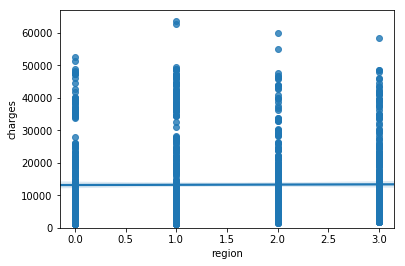

In [103]:
sns.regplot(x=df['region'],y=df['charges'],data=df)
plt.ylim(0,)

(0, 66925.0097041049)

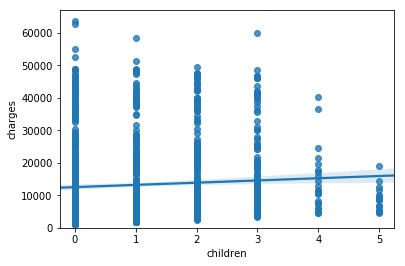

In [104]:
sns.regplot(x=df['children'],y=df['charges'],data=df)
plt.ylim(0,)

In [105]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


(0, 66925.0097041049)

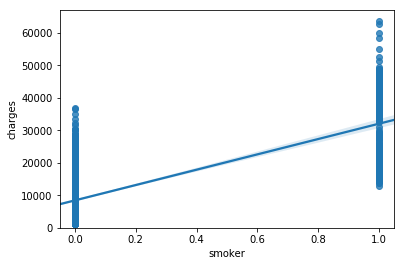

In [106]:
sns.regplot(x=df['smoker'],y=df['charges'],data=df)
plt.ylim(0,)

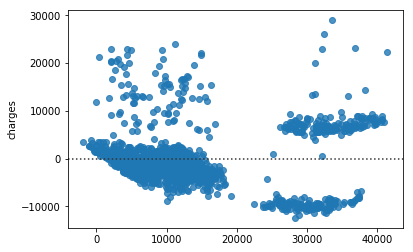

In [107]:
sns.residplot(yhat,df['charges'])

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mean_squared_error(df['charges'],yhat)

37005395.7505075

In [110]:
lm.score(z,df['charges'])

0.7474771588119513